Importacion de librerias

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de los datasets

In [319]:
#importación de ficheros Excel 
df_orders = pd.read_excel('../Datos/orders.xlsx', engine='openpyxl')
df_food = pd.read_excel('../Datos/food.xlsx', engine='openpyxl')
df_menu = pd.read_excel('../Datos/menu.xlsx', engine='openpyxl')
df_restaurant = pd.read_excel('../Datos/restaurant.xlsx', engine='openpyxl')
df_users = pd.read_excel('../Datos/users.xlsx', engine='openpyxl')





Exploracion inicial de los diferentes datasets

df_food

In [320]:
# Exploración inicial de los datos df_food
df_food.info()
df_food.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371560 entries, 0 to 371559
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_id            371552 non-null  object
 1   item            371552 non-null  object
 2   veg_or_non_veg  371552 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB


,f_id,item,veg_or_non_veg
107489,fd230596,Duo of Mushroom Strognoff,Veg
38255,fd77887,Havmor Kulfi Scoop 150ml,Veg
17725,fd34620,Aloo Anar Ki Tikki,Veg
208291,fd542199,Dahi MeatContains mutton.,Non-veg
197205,fd506944,Pineapple (Cup),Veg


In [321]:
#comprobamos si hay valores nulos
print(df_food.isnull().sum())
#comprobamos si hay valores repetidos
print(df_food.duplicated().sum())
#comprobamos cuantas valores unicos hay en cada columna
print(df_food.nunique())



f_id              8
item              8
veg_or_non_veg    8
dtype: int64
7
f_id              371552
item              369347
veg_or_non_veg         2
dtype: int64


In [322]:
#visualizacion de las filas donde hay valores nulos en df_food
print(df_food[df_food.isnull().any(axis=1)])


       f_id item veg_or_non_veg
13540   NaN  NaN            NaN
99966   NaN  NaN            NaN
99988   NaN  NaN            NaN
99989   NaN  NaN            NaN
99991   NaN  NaN            NaN
99993   NaN  NaN            NaN
99994   NaN  NaN            NaN
166711  NaN  NaN            NaN


df_menu

In [323]:
# Exploración inicial de los datos df_menu
df_menu.info()
df_menu.sample(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   menu_id  1048575 non-null  object 
 1   r_id     1048575 non-null  int64  
 2   f_id     1048575 non-null  object 
 3   cuisine  1048575 non-null  object 
 4   price    1048574 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


,menu_id,r_id,f_id,cuisine,price
607838,mn987948,447704,fd90714,"Desserts,Beverages",139.0
814492,mn283099,490370,fd283099,"Tandoor,Indian",180.0
447579,mn359910,535969,fd18684,"Bakery,Desserts",89.0
979067,mn612773,455285,fd612773,Bakery,180.0
117941,mn984056,248121,fd975,"Juices,Ice Cream",59.0
875209,mn408021,59426,fd408021,Indian,245.0
201584,mn568765,112626,fd47222,"Chinese,North Indian",260.0
943198,mn538720,107018,fd538720,"Italian,Chinese",160.0
741110,mn171570,214446,fd171570,"Chinese,Continental",260.0
645107,mn963939,239289,fd106830,"Ice Cream,Desserts",85.0


In [324]:
#visualizacion de las filas donde hay valores nulos en df_menu
print(df_menu[df_menu.isnull().any(axis=1)])


         menu_id    r_id      f_id       cuisine  price
878051  mn414862  496987  fd413746  South Indian    NaN


In [325]:
#comprobamos si hay valores nulos
print(df_menu.isnull().sum())
#comprobamos si hay valores repetidos
print(df_menu.duplicated().sum())
#comprobamos cuantas valores unicos hay en cada columna
print(df_menu.nunique())


menu_id    0
r_id       0
f_id       0
cuisine    0
price      1
dtype: int64
0
menu_id    918168
r_id        12117
f_id       282381
cuisine      1436
price        3308
dtype: int64


In [326]:
#comprobamos la cantidad de restaurantes que tienen el mismo menu_id
print(df_menu['menu_id'].value_counts())

menu_id
mn949133    2
mn778917    2
mn916630    2
mn778910    2
mn69201     2
           ..
mn839251    1
mn780169    1
mn780167    1
mn780166    1
mn780151    1
Name: count, Length: 918168, dtype: int64


In [327]:
#comprobamos la fila que tiene un valor nulo en price
print(df_menu[df_menu['price'].isnull()])


         menu_id    r_id      f_id       cuisine  price
878051  mn414862  496987  fd413746  South Indian    NaN


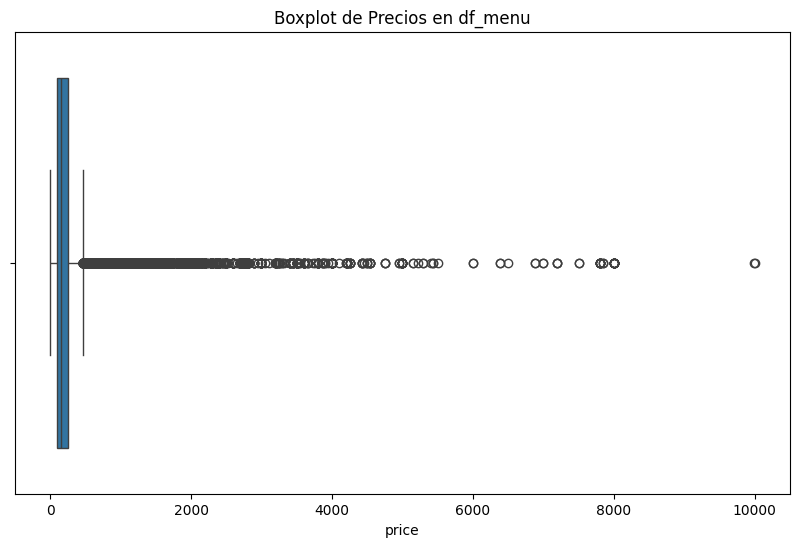

In [328]:
#visualizacion de outliers en la columna price de df_menu
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_menu['price'])
plt.title('Boxplot de Precios en df_menu')
plt.show()




In [329]:
#informacion de medias, mediana, moda, desviaciones estandar, minimos, maximos y percentiles de la columna price en df_menu
print(df_menu['price'].describe())
print("Moda de price:", df_menu['price'].mode()[0])
print("Mediana de price:", df_menu['price'].median())



count    1.048574e+06
mean     1.969102e+02
std      1.705025e+02
min      0.000000e+00
25%      1.000000e+02
50%      1.600000e+02
75%      2.490000e+02
max      9.999000e+03
Name: price, dtype: float64
Moda de price: 120.0
Mediana de price: 160.0


df_orders

In [330]:
# Exploración inicial de los datos df_orders
df_orders.info()
df_orders.sample(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    150281 non-null  datetime64[ns]
 1   sales_qty     150281 non-null  int64         
 2   sales_amount  150281 non-null  int64         
 3   currency      150281 non-null  object        
 4   user_id       150281 non-null  int64         
 5   r_id          148664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.9+ MB


,order_date,sales_qty,sales_amount,currency,user_id,r_id
63803,2018-06-27,2,347,INR,69183,536017.0
149206,2019-03-05,1,1741,INR,35585,139864.0
83768,2020-02-13,1,56,INR,16838,549988.0
2849,2019-04-30,149,18093,INR,32635,125372.0
121574,2018-10-11,1,144,INR,58666,549419.0


In [331]:
#comprobamos los valores nulos
print(df_orders.isnull().sum())
#comprobamos los valores duplicados
print(df_orders.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_orders.nunique())


order_date         0
sales_qty          0
sales_amount       0
currency           0
user_id            0
r_id            1617
dtype: int64
0
order_date         806
sales_qty          566
sales_amount      7983
currency             1
user_id          77929
r_id            148541
dtype: int64


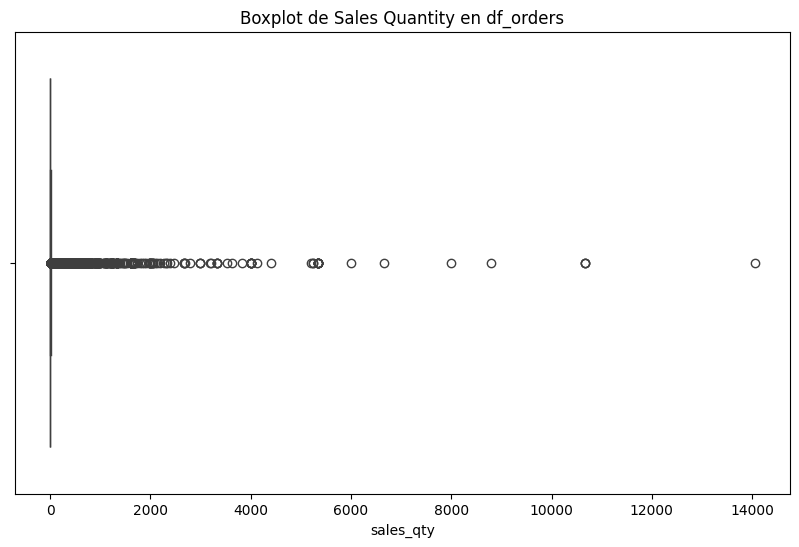

count    150281.000000
mean         16.264997
std         114.761496
min           1.000000
25%           1.000000
50%           1.000000
75%           7.000000
max       14049.000000
Name: sales_qty, dtype: float64
Moda de sales_qty: 1


In [332]:
#visualizacion de outliers en la columna sales_qty de df_orders
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_orders['sales_qty'])
plt.title('Boxplot de Sales Quantity en df_orders')
plt.show()
#informacion de medias, mediana, moda, desviaciones estandar, minimos, maximos y percentiles de la columna sales_qty en df_orders
print(df_orders['sales_qty'].describe())
print("Moda de sales_qty:", df_orders['sales_qty'].mode()[0])


 


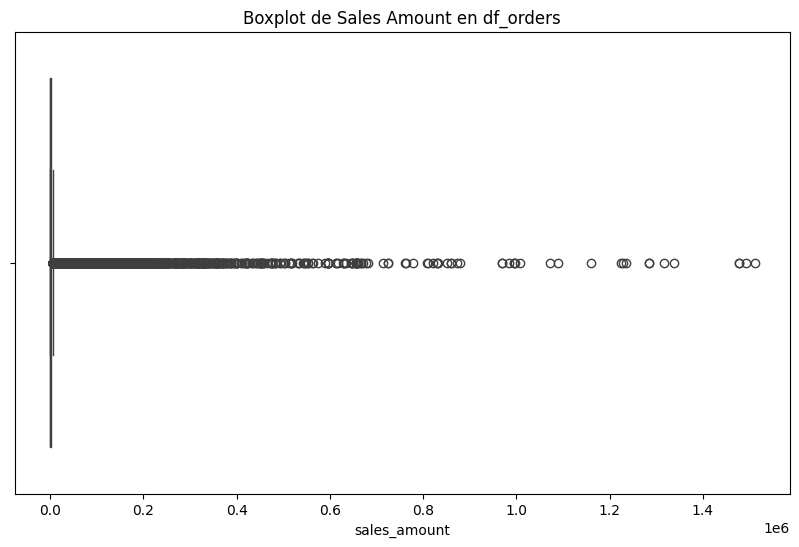

count    1.502810e+05
mean     6.564802e+03
std      2.991743e+04
min     -1.000000e+00
25%      1.710000e+02
50%      5.090000e+02
75%      3.000000e+03
max      1.510944e+06
Name: sales_amount, dtype: float64


In [333]:
#visualizacion de outliers en la columna sales_amount de df_orders
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_orders['sales_amount'])
plt.title('Boxplot de Sales Amount en df_orders')
plt.show()
#informacion de medias, desviaciones estandar, minimos, maximos y percentiles de la columna sales_amount en df_orders
print(df_orders['sales_amount'].describe())


In [334]:
# comprobamos si existe el valor 0 en sales_amount
print(df_orders[df_orders['sales_amount'] == 0])
# comprobamos la cantidadde valor 0 en sales_amount
print("Cantidad de filas con sales_amount 0:", df_orders[df_orders['sales_amount'] == 0].shape[0])
# eliminamos las filas con sales_amount 0
df_orders = df_orders[df_orders['sales_amount'] != 0]


       order_date  sales_qty  sales_amount currency  user_id      r_id
112    2017-11-15       1267             0      INR    22145  381392.0
511    2018-07-03        474             0      INR    27050  482808.0
690    2018-08-28        381             0      INR     3173  389305.0
1131   2019-07-23        268             0      INR    61028  568007.0
1246   2019-02-18        256             0      INR    69436  421839.0
...           ...        ...           ...      ...      ...       ...
149409 2019-07-15          1             0      INR      976       NaN
149427 2019-07-25          1             0      INR    95701       NaN
149460 2019-08-16          1             0      INR    13971       NaN
149498 2019-09-09          1             0      INR    21153       NaN
149613 2019-11-19          1             0      INR    64848       NaN

[1609 rows x 6 columns]
Cantidad de filas con sales_amount 0: 1609


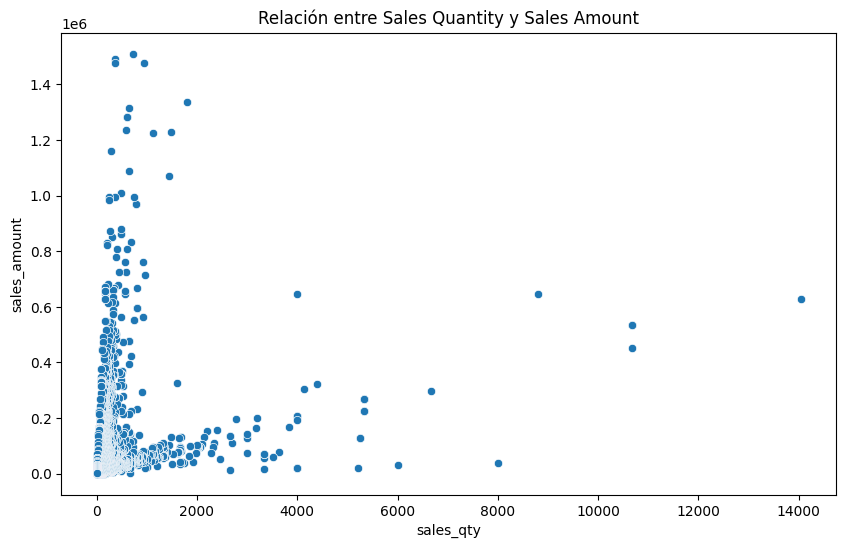

In [335]:
#corelacion entre sales_qty y sales_amount en df_orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_qty', y='sales_amount', data=df_orders)
plt.title('Relación entre Sales Quantity y Sales Amount')
plt.show()


df_restaurant

In [336]:
# Exploración inicial de los datos df_restaurant
df_restaurant.info()
df_restaurant.sample(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148540 entries, 0 to 148539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148540 non-null  int64 
 1   name          148454 non-null  object
 2   Country       148540 non-null  object
 3   city          148540 non-null  object
 4   rating        148454 non-null  object
 5   rating_count  148454 non-null  object
 6   cuisine       148441 non-null  object
 7   link          148540 non-null  object
 8   address       148454 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.2+ MB


,id,name,Country,city,rating,rating_count,cuisine,link,address
114861,277172,Rolls Xpress,India,Nanded,--,Too Few Ratings,Snacks,https://www.swiggy.com/restaurants/rolls-xpres...,"Rolls Xpress, Near vijay nagar nagsen nagar na..."
77646,11185,Yum Yum Tree,India,"Madhapur,Hyderabad",3.6,100+ ratings,"Arabian,Fast Food",https://www.swiggy.com/restaurants/yum-yum-tre...,"Yum Yum Tree, 1st Floor - Above OVer the Flame..."
138323,528563,PICKARA KITCHEN & FOOD CORNER,India,Sirsa,--,Too Few Ratings,"North Indian,Chinese",https://www.swiggy.com/restaurants/pickara-kit...,"PICKARA KITCHEN & FOOD CORNER, SHOP NO.10/24-2..."
45568,545502,Jonahs Bistro,India,"Gandhipuram,Coimbatore",--,Too Few Ratings,"Chinese,Fast Food",https://www.swiggy.com/restaurants/jonahs-bist...,"Jonahs Bistro, NO.67/71, Shop No.T-13 & T-14, ..."
43772,117303,Mambalam Annashree,India,"T Nagar,Chennai",3.9,1K+ ratings,"South Indian,North Indian",https://www.swiggy.com/restaurants/mambalam-an...,"Mambalam Annashree, NO.09, VIJAYARAGHAVA ROAD,..."
17022,278121,Maggie's Kitchen,India,"BTM,Bangalore",--,Too Few Ratings,Chinese,https://www.swiggy.com/restaurants/maggies-kit...,"Maggie's Kitchen, No.18, Sai Pushpanjali Nilay..."
131448,313969,Ishan Pure Veg,India,"Shivaji Nagar,Pune",4.5,500+ ratings,"North Indian,Chinese",https://www.swiggy.com/restaurants/ishan-pure-...,"Ishan Pure Veg, 448/2, Pareepriya Apartment, N..."
50450,383084,Nori,India,"Punjabi Bagh,Delhi",--,Too Few Ratings,"Asian,Chinese",https://www.swiggy.com/restaurants/nori-punjab...,"Nori, 2 NWA, Club Road, Punjabi Bagh,New Delhi..."
119332,511942,Chandan Momo,India,Patna,--,Too Few Ratings,Chaat,https://www.swiggy.com/restaurants/chandan-mom...,"Chandan Momo, Maurya Complex, Below Bank of Ba..."
29810,524979,Apna sweets,India,Bokaro,--,Too Few Ratings,Sweets,https://www.swiggy.com/restaurants/apna-sweets...,"Apna sweets, RC2V+RPQ, Baba Colony, Hirapur, C..."


In [337]:
#comprobamos los valores nulos
print(df_restaurant.isnull().sum())
#comprobamos los valores duplicados
print(df_restaurant.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_restaurant.nunique())



id               0
name            86
Country          0
city             0
rating          86
rating_count    86
cuisine         99
link             0
address         86
dtype: int64
0
id              148540
name            112817
Country              1
city               821
rating              42
rating_count         8
cuisine           2132
link            148540
address         148400
dtype: int64


In [338]:
# percentajes por columna de valores nulos en df_restaurant
nulos_restaurant = df_restaurant.isnull().sum()
percent_nulos_restaurant = (nulos_restaurant / len(df_restaurant)) * 100
print(percent_nulos_restaurant)


id              0.000000
name            0.057897
Country         0.000000
city            0.000000
rating          0.057897
rating_count    0.057897
cuisine         0.066649
link            0.000000
address         0.057897
dtype: float64


In [339]:
#visualizacion de un sample de las filas donde hay valores nulos en la columna name en df_restaurant
print(df_restaurant[df_restaurant['name'].isnull()].sample(5))
print(df_restaurant[df_restaurant['name'].isnull()])



            id name Country              city rating rating_count cuisine  \
86317   555224  NaN   India            Kanpur    NaN          NaN     NaN   
117659   21866  NaN   India           Noida-1    NaN          NaN     NaN   
133260  357033  NaN   India            Purnea    NaN          NaN     NaN   
96477   386095  NaN   India  Jadavpur,Kolkata    NaN          NaN     NaN   
135615  546848  NaN   India            Rohtak    NaN          NaN     NaN   

                                                     link address  
86317   https://www.swiggy.com/restaurants/m-s-laxmi-b...     NaN  
117659  https://www.swiggy.com/restaurants/imly-mall-o...     NaN  
133260  https://www.swiggy.com/restaurants/tandoori-ma...     NaN  
96477   https://www.swiggy.com/restaurants/the-kunals-...     NaN  
135615  https://www.swiggy.com/restaurants/sunshine-sh...     NaN  
            id name Country                       city rating rating_count  \
31044   397961  NaN   India  Greater Mohali,Chandig

In [340]:
#comprobamos cuantos valores maxima hay en la columna cuisine
print(df_restaurant['cuisine'].value_counts().head(20))


cuisine
North Indian,Chinese    6471
Indian                  6414
Chinese                 5051
North Indian            4775
Indian,Chinese          4374
South Indian            3303
Bakery                  3132
Chinese,Indian          2308
Chinese,North Indian    2288
Bakery,Desserts         2233
Biryani                 2227
Pizzas                  2215
Beverages               2157
North Indian,Indian     2004
Snacks                  1788
Fast Food               1671
Biryani,North Indian    1644
Chinese,Snacks          1622
Fast Food,Snacks        1601
Ice Cream,Desserts      1577
Name: count, dtype: int64


In [341]:
#comprobamos cuantos valores maxima hay en cada celda de la columna cuisine
# descartamos los valores nulos antes de aplicar len para evitar TypeError
print(df_restaurant['cuisine'].dropna().str.split(',').apply(len).value_counts())
# cuantas valores unicas hay en total en cada celda de la columna cuisine
unique_cuisines = set()
for cuisines in df_restaurant['cuisine'].dropna():
    for cuisine in cuisines.split(','):
        unique_cuisines.add(cuisine.strip())
print(f'Total unique cuisines: {len(unique_cuisines)}')
print(f'Unique cuisines: {unique_cuisines}')

cuisine
2    108069
1     40372
Name: count, dtype: int64
Total unique cuisines: 126
Unique cuisines: {'Ice Cream', 'Tibetan', 'Punjabi', 'Barbecue', 'Burmese', 'South American', 'Desserts', 'Biryani - Shivaji Military Hotel', 'Discount offer from Garden Cafe Express Kankurgachi', 'Chaat', 'Sindhi', 'Jain', 'Seafood', 'Malwani', 'Bhutanese', 'Hyderabadi', 'BEVERAGE', 'Attractive Combos Available', 'Rayalaseema', 'Kerala', 'North Eastern', 'Korean', 'Turkish', 'Oriental', 'European', 'Bengali', 'German', 'Pastas', 'Bowl Company', 'Greek', 'Special Discount from (Hotel Swagath)', 'North Indian', 'Pizzas', 'Middle Eastern', 'Oriya', 'Steakhouse', 'Beverages', 'Parsi', 'Sri Lankan', 'Assamese', 'Haleem', 'Mongolian', 'Paan', 'Khasi', 'Kashmiri', 'Awadhi', 'Rajasthani', 'Maharashtrian', 'Italian', 'Konkan', 'MAX 2 Combos per Order!', 'Chinese', 'Bihari', 'Afghani', 'Malaysian', 'Spanish', 'British', 'Continental', 'Tribal', 'Mughlai', 'Tandoor', 'Bakery products', 'Asian', 'Mediterranean', 

df_users

In [342]:
# Exploración inicial de los datos df_users
df_users.info()
df_users.sample(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         100000 non-null  int64 
 1   name            100000 non-null  object
 2   Age             100000 non-null  int64 
 3   Gender          100000 non-null  object
 4   Marital Status  100000 non-null  object
 5   Occupation      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


,user_id,name,Age,Gender,Marital Status,Occupation
55227,55228,Emily Cole,32,Female,Married,Employee
59647,59648,Catherine Stevenson,24,Female,Single,Employee
23092,23093,Kaitlin Mendoza,23,Male,Single,Student
85362,85363,Anthony Christian,22,Male,Single,Student
98779,98780,Mackenzie Bradford,24,Male,Single,Student
95807,95808,Jesus Sanders,29,Male,Single,Self Employeed
32450,32451,Thomas Jones,26,Female,Married,Employee
85437,85438,Alice Johnson,21,Male,Single,Student
37763,37764,Destiny Hutchinson,25,Male,Single,Student
28940,28941,Carrie Johnson,26,Female,Married,Self Employeed


In [343]:
#comprobamos los valores nulos
print(df_users.isnull().sum())
#comprobamos los valores duplicados
print(df_users.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_users.nunique())


user_id           0
name              0
Age               0
Gender            0
Marital Status    0
Occupation        0
dtype: int64
0
user_id           100000
name               71251
Age                   16
Gender                 2
Marital Status         3
Occupation             4
dtype: int64


In [344]:
#compromamos el rango de edades en la columna age en df_users
print("Edad mínima:", df_users['Age'].min())
print("Edad máxima:", df_users['Age'].max())


Edad mínima: 18
Edad máxima: 33


Limpieza por dataset

In [345]:
#df_restaurant
#eliminacion de las filas con valores nulos en la columna name de df_restaurant
df_restaurant = df_restaurant.dropna(subset=['name'])

#eliminacion de las filas con direccion duplicada
df_restaurant = df_restaurant.drop_duplicates(subset=['address'], keep='first')

#cambio de nombre de la columna id de df_restaurant a r_id para posterior combinacion
df_restaurant = df_restaurant.rename(columns={'id': 'r_id'})

#cambio de los valores '--' en la columna rating a valor Null
df_restaurant.replace("--", np.nan, inplace=True)

#cambio de tipo de dato de la columna rating de object a float
df_restaurant['rating'] = df_restaurant['rating'].astype(float)

#cambio de nombre de la columna name a r_name en df_restaurant
df_restaurant = df_restaurant.rename(columns={'name': 'r_name'})

#eliminacion de las columnas country, link y address de df_restaurant
df_restaurant = df_restaurant.drop(columns=['Country', 'link', 'address'])

#comprobacion de los cambios realizados en df_restaurant
df_restaurant.info()
df_restaurant.sample(5)


<class 'pandas.core.frame.DataFrame'>
Index: 148400 entries, 0 to 148539
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   r_id          148400 non-null  int64  
 1   r_name        148400 non-null  object 
 2   city          148400 non-null  object 
 3   rating        61425 non-null   float64
 4   rating_count  148400 non-null  object 
 5   cuisine       148387 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.9+ MB


C:\Users\sebas\AppData\Local\Temp\ipykernel_37260\1519023198.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_restaurant.replace("--", np.nan, inplace=True)


,r_id,r_name,city,rating,rating_count,cuisine
72374,12410,Riti Foods,"Kachiguda,Hyderabad",4.3,100+ ratings,"Chaat,Italian"
102067,550998,VROSH CARE,"BRS Nagar,Ludhiana",NaN,Too Few Ratings,Indian
62431,261288,Steak House,Duliajan,3.7,20+ ratings,"Chinese,Continental"
71165,253202,Panda Momos Family Restaurant,Hospet,NaN,Too Few Ratings,"North Indian,South Indian"
64322,536626,NTR's Secret Kitchen,Gandhidham,3.9,20+ ratings,"Biryani,Chinese"


In [346]:
#creamos 2 nuevas columnas cuisine_1 y cuisine_2 para separar los tipos de cocina cuando hay mas de un tipo de cocina
df_restaurant[['cuisine_1', 'cuisine_2']] = df_restaurant['cuisine'].str.split(',', n=1, expand=True)
#quitamos espacios en blanco al inicio y al final de los valores en las nuevas columnas
df_restaurant['cuisine_1'] = df_restaurant['cuisine_1'].str.strip()
df_restaurant['cuisine_2'] = df_restaurant['cuisine_2'].str.strip()
#quitmos la columna cuisine original
df_restaurant = df_restaurant.drop(columns=['cuisine'])
df_restaurant.head(5)

,r_id,r_name,city,rating,rating_count,cuisine_1,cuisine_2
0,567335,AB FOODS POINT,Abohar,NaN,Too Few Ratings,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,Beverages,None
3,187912,Singh Hut,Abohar,3.7,20+ ratings,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,NaN,Too Few Ratings,Italian-American,Fast Food


In [347]:
def categorize_cuisine(row):
    # Convertimos a minúsculas para evitar problemas de mayúsculas/minúsculas
    cuisine_1 = str(row['cuisine_1']).strip().lower()
    cuisine_2 = str(row['cuisine_2']).strip().lower()
    
    # Definimos categorías basadas en los tipos de cocina (también en minúsculas)
    categories = {
        'Italian': ['italian', 'pizza', 'pasta', 'mediterranean', 'pastas', 'pizzas'],
        'Asian': ['chinese', 'dim sum', 'szechuan', 'asian', 'tibetan', 'thai', 'oriental', 'burmese', 'korean', 'malaysian', 'singaporean',
                   'vietnamese', 'noodles', 'nepalese', 'pan-asian'],
        'Indian': ['indian', 'curry', 'tandoori', 'punjabi', 'bengali', 'gujarati', 'rajasthani', 'maharashtrian', 'kerala', 'chettinad', 
                   'mughlai', 'hyderabadi', 'biryani', 'tandoor', 'thali', 'chaat', 'north indian', 'south indian', 'thalis', 'North Indian',
                     'naga', 'bihari', 'north eastern', 'andhra', 'parsi', 'goan', 'haleem', 'assamese', 'mangalorean', 'malwani'],
        'Mexican': ['mexican', 'tacos', 'burritos'],
        'Fast Food': ['fast food', 'burgers', 'fries', 'snacks', 'snack', 'street food', 'combo'],
        'Japanese': ['japanese', 'sushi', 'ramen'],
        'Fish and Seafood': ['seafood', 'fish', 'coastal'],
        'Vegetarian': ['vegetarian', 'vegan'],
        'Desserts': ['desserts', 'ice cream', 'bakery', 'sweets', 'paan', 'bakery products', 'waffles', 'waffle', 'ice cream cakes'],
        'Beverage': ['cafe', 'coffee', 'tea', 'juice', 'beverages', 'juices'],
        'American': ['american', 'steakhouse', 'bbq', 'grill', 'barbecue', 'italian-american'],
        'European': ['french', 'bistro', 'crepes', 'european', 'continental', 'continental food'],
        'Middle Eastern': ['middle eastern', 'lebanese', 'persian', 'arabian', 'shawarma', 'kebab', 'afghani', 'turkish', 'kebabs'],
        'Healthy': ['healthy', 'salads', 'organic', 'gluten free', 'salad', 'healthy food'],
        
    }
    
    for category, cuisines in categories.items():
        if cuisine_1 in cuisines or cuisine_2 in cuisines:
            return category
    return 'Other'

In [348]:
#contamos los valores de la nueva columna cuisine_category
df_restaurant['cuisine_category'] = df_restaurant.apply(categorize_cuisine, axis=1)
print(df_restaurant['cuisine_category'].value_counts())
df_restaurant.sample(5)

cuisine_category
Indian              55909
Asian               36260
Desserts            17020
Fast Food           16356
Italian             14270
Beverage             4614
American             1213
Middle Eastern        924
Healthy               621
European              614
Mexican               314
Fish and Seafood      122
Japanese               87
Other                  76
Name: count, dtype: int64


,r_id,r_name,city,rating,rating_count,cuisine_1,cuisine_2,cuisine_category
23290,65189,The Chinese Food Company,"Central Bangalore,Bangalore",NaN,Too Few Ratings,Chinese,Seafood,Asian
70586,459740,Chennai Xpress Restaurant,Haridwar,4.0,20+ ratings,South Indian,None,Indian
84814,353159,KANHAIYA RESTAURANT & CAFE,Jodhpur,3.9,20+ ratings,North Indian,None,Indian
86813,226139,U B Food Heaven,Kapurthala,NaN,Too Few Ratings,Pastas,Pizzas,Italian
69359,471090,House Party,"Ganeshguri,Guwahati",NaN,Too Few Ratings,Beverages,Salads,Beverage


In [349]:
#eliminacion de las filas con valores nulos en cuisine_1 en df_restaurant
df_restaurant = df_restaurant.dropna(subset=['cuisine_1'])
#eliminacion de las filas con valores incorecto (8:15 To 11:30 Pm) en la columna cuisine_1 en df_restaurant
df_restaurant = df_restaurant[df_restaurant['cuisine_1'] != '8:15 To 11:30 Pm']


In [350]:
#crea una tabla de cocina_1, cocina_2 y categoria de cocina de df_restaurant que tengan la categoria 'other'
other_cuisines_df = df_restaurant[df_restaurant['cuisine_category'] == 'Other'][['cuisine_1', 'cuisine_2', 'cuisine_category']]



In [351]:
#eliminacion de filas con valores nulos en r_id de df_orders
df_orders = df_orders.dropna(subset=['r_id'])

#cambio de tipo de dato de la columna r_id de float a int en df_orders
df_orders['r_id'] = df_orders['r_id'].astype(int)

#eliminacion de la columna currency de df_orders
df_orders = df_orders.drop(columns=['currency'])

# creacion de la columna day en df_orders
df_orders['day'] = df_orders['order_date'].dt.day_name()

# creacion de la columna month en df_orders en formato numerico
df_orders['month'] = df_orders['order_date'].dt.month

# creacion de la columna year en df_orders
df_orders['year'] = df_orders['order_date'].dt.year

# movemos las columnas day, month y year para que estén después de order_date en df_orders
cols = df_orders.columns.tolist()
cols.insert(cols.index('order_date') + 1, cols.pop(cols.index('day')))
cols.insert(cols.index('order_date') + 2, cols.pop(cols.index('month')))
cols.insert(cols.index('order_date') + 3, cols.pop(cols.index('year')))
df_orders = df_orders[cols]

#eliminamos las filas con valor 0 en sales amount en df_orders
df_orders = df_orders[df_orders['sales_amount'] != 0]


#comprobacion de los cambios realizados en df_orders
df_orders.info()
df_orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 147065 entries, 0 to 149227
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    147065 non-null  datetime64[ns]
 1   day           147065 non-null  object        
 2   month         147065 non-null  int32         
 3   year          147065 non-null  int32         
 4   sales_qty     147065 non-null  int64         
 5   sales_amount  147065 non-null  int64         
 6   user_id       147065 non-null  int64         
 7   r_id          147065 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(1)
memory usage: 9.0+ MB


,order_date,day,month,year,sales_qty,sales_amount,user_id,r_id
19093,2018-09-25,Tuesday,9,2018,21,7727,81744,1720
116021,2018-03-23,Friday,3,2018,1,32,12273,350540
6686,2018-03-23,Friday,3,2018,75,19810,37947,572840
111309,2018-07-25,Wednesday,7,2018,1,241,95421,430636
140422,2019-04-09,Tuesday,4,2019,1,74,97296,123794


In [352]:
# creacion de la columna average_sales_price en df_orders con 2 decimals
df_orders['average_sales_price'] = round(df_orders['sales_amount'] / df_orders['sales_qty'], 2)
# movemos la columna average_sales_price para que esté después de sales_amount en df_final
cols = df_orders.columns.tolist()
cols.insert(cols.index('sales_amount') + 1, cols.pop(cols.index('average_sales_price')))
df_orders = df_orders[cols]
#comprobacion de los cambios realizados en df_orders
df_orders.info()
df_orders.sample(5)




<class 'pandas.core.frame.DataFrame'>
Index: 147065 entries, 0 to 149227
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_date           147065 non-null  datetime64[ns]
 1   day                  147065 non-null  object        
 2   month                147065 non-null  int32         
 3   year                 147065 non-null  int32         
 4   sales_qty            147065 non-null  int64         
 5   sales_amount         147065 non-null  int64         
 6   average_sales_price  147065 non-null  float64       
 7   user_id              147065 non-null  int64         
 8   r_id                 147065 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(1)
memory usage: 10.1+ MB


,order_date,day,month,year,sales_qty,sales_amount,average_sales_price,user_id,r_id
93417,2018-07-06,Friday,7,2018,1,194,194.00,19001,563811
12167,2018-03-27,Tuesday,3,2018,40,3056,76.40,6641,447775
110727,2019-05-23,Thursday,5,2019,1,88,88.00,48051,249765
21389,2020-02-12,Wednesday,2,2020,18,9880,548.89,34933,370576
39141,2018-12-18,Tuesday,12,2018,7,10009,1429.86,5471,415057


In [353]:
#df_users
#cambio de nombre de la columna name a r_name en df_restaurant
df_users = df_users.rename(columns={'name': 'u_name'})


Combinacion de data frames

In [354]:
#juntamos los dataframes orders y df_users by u_id
df_orders_users = pd.merge(df_orders, df_users, on='user_id', how='left')
#juntamos el dataframe resultante con df_restaurant by r_id
df_final = pd.merge(df_orders_users, df_restaurant, on='r_id', how='left')
df_final.info()
df_final.sample(5)
#comprobamos si hay valores repetidos
df_final.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147065 entries, 0 to 147064
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_date           147065 non-null  datetime64[ns]
 1   day                  147065 non-null  object        
 2   month                147065 non-null  int32         
 3   year                 147065 non-null  int32         
 4   sales_qty            147065 non-null  int64         
 5   sales_amount         147065 non-null  int64         
 6   average_sales_price  147065 non-null  float64       
 7   user_id              147065 non-null  int64         
 8   r_id                 147065 non-null  int64         
 9   u_name               147065 non-null  object        
 10  Age                  147065 non-null  int64         
 11  Gender               147065 non-null  object        
 12  Marital Status       147065 non-null  object        
 13  Occupation    

np.int64(0)

In [355]:
#comprobamos si hay valores repetidos
df_final.duplicated().sum()


np.int64(0)

In [357]:
#eliminacion de las filas con valores nulos en la columna r_name de df_final
df_final = df_final.dropna(subset=['r_name'])
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146906 entries, 0 to 147064
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_date           146906 non-null  datetime64[ns]
 1   day                  146906 non-null  object        
 2   month                146906 non-null  int32         
 3   year                 146906 non-null  int32         
 4   sales_qty            146906 non-null  int64         
 5   sales_amount         146906 non-null  int64         
 6   average_sales_price  146906 non-null  float64       
 7   user_id              146906 non-null  int64         
 8   r_id                 146906 non-null  int64         
 9   u_name               146906 non-null  object        
 10  Age                  146906 non-null  int64         
 11  Gender               146906 non-null  object        
 12  Marital Status       146906 non-null  object        
 13  Occupation         

In [361]:
#movemos la  columna r_id despues de Occupation en df_final
cols = df_final.columns.tolist()
cols.insert(cols.index('Occupation'), cols.pop(cols.index('r_id')))
df_final = df_final[cols]

#convertimos los titulos de las columnas a minusculas
df_final.columns = [col.lower() for col in df_final.columns]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146906 entries, 0 to 147064
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_date           146906 non-null  datetime64[ns]
 1   day                  146906 non-null  object        
 2   month                146906 non-null  int32         
 3   year                 146906 non-null  int32         
 4   sales_qty            146906 non-null  int64         
 5   sales_amount         146906 non-null  int64         
 6   average_sales_price  146906 non-null  float64       
 7   user_id              146906 non-null  int64         
 8   u_name               146906 non-null  object        
 9   age                  146906 non-null  int64         
 10  gender               146906 non-null  object        
 11  marital status       146906 non-null  object        
 12  r_id                 146906 non-null  int64         
 13  occupation         

In [359]:
#guardamos el dataframe final en un fichero csv
df_final.to_csv('../Datos/df_final.csv', index=False)


In [360]:
#importamos el fichero csv para comprobar que se ha guardado correctamente
df_full = pd.read_csv('../Datos/df_final.csv')
df_full.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146906 entries, 0 to 146905
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_date           146906 non-null  object 
 1   day                  146906 non-null  object 
 2   month                146906 non-null  int64  
 3   year                 146906 non-null  int64  
 4   sales_qty            146906 non-null  int64  
 5   sales_amount         146906 non-null  int64  
 6   average_sales_price  146906 non-null  float64
 7   user_id              146906 non-null  int64  
 8   u_name               146906 non-null  object 
 9   Age                  146906 non-null  int64  
 10  Gender               146906 non-null  object 
 11  Marital Status       146906 non-null  object 
 12  Occupation           146906 non-null  object 
 13  r_id                 146906 non-null  int64  
 14  r_name               146906 non-null  object 
 15  city             

Análisis descriptivo global

In [ ]:
#mostar todos los valores unicos de tipo de comidas en la columna cuisine de df_final
print(df_final['cuisine'].unique())
#numero de tipos de comidas unicos en la columna cuisine de df_final
print("Número de tipos de comidas únicos:", df_final['cuisine'].nunique())




